<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/nlp-with-transformers/blob/main/11_future-directions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [13]:
# 코랩이나 캐글을 사용한다면 이 셀의 주석을 제거하고 실행하세요.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=11)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 414, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 414 (delta 87), reused 44 (delta 19), pack-reused 266
Receiving objects: 100% (414/414), 43.17 MiB | 9.67 MiB/s, done.
Resolving deltas: 100% (186/186), done.
/content/nlp-with-transformers/nlp-with-transformers
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing torch-scatter for torch v1.12.1 ...
torch-scatter installed!
⏳ Installing soundfile ...
✅ soundfile installed!
🥳 Chapter installation complete!
Using transformers v4.21.3
Using datasets v2.4.0
Using accelerate v0.12.0
Using sentencepiece v0.1.97


# 향후 방향

## 트랜스포머 확장

In [14]:
model_data = [
    {'date': '12-06-2017', 'name': 'Transformer', 'size': 213*1e6},
    {'date': '11-06-2018', 'name': 'GPT', 'size': 110*1e6},
    {'date': '11-10-2018', 'name': 'BERT', 'size': 340*1e6},
    {'date': '14-02-2019', 'name': 'GPT-2', 'size': 1.5*1e9},
    {'date': '23-10-2019', 'name': 'T5', 'size': 11*1e9},
    {'date': '17-09-2019', 'name': 'Megatron', 'size': 8.3*1e9},
    {'date': '13-02-2020', 'name': 'Turing-NLG', 'size': 17*1e9},
    {'date': '30-06-2020', 'name': 'GShard', 'size': 600*1e9},
    {'date': '28-05-2020', 'name': 'GPT-3', 'size': 175*1e9},
    {'date': '11-01-2021', 'name': 'Switch-C', 'size': 1.571*10e12},
]

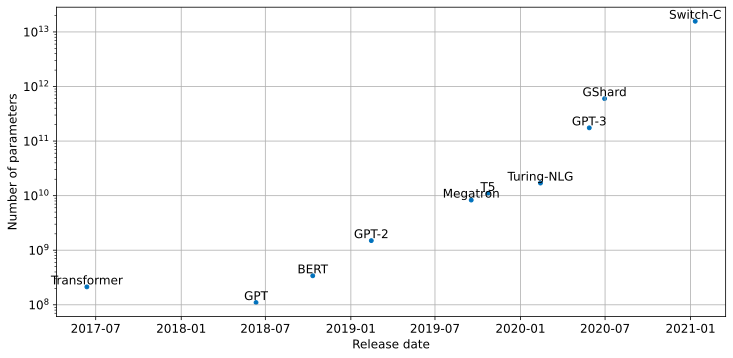

In [15]:
# 중요 트랜스포머 아키텍처의 파라미터 개수
import pandas as pd
import matplotlib.pyplot as plt

def label_point(x, y, val, ax):
    a = pd.concat({"x": x, "y": y, "val": val}, axis=1)
    for i, point in a.iterrows():
        ax.text(
            point["x"],
            point["y"],
            str(point["val"]),
            horizontalalignment="center",
            verticalalignment="bottom",
        )


df_lm = pd.DataFrame.from_records(model_data)
df_lm["date"] = pd.to_datetime(df_lm["date"], dayfirst=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df_lm.plot(x="date", y="size", kind="scatter", s=15, ax=ax)
ax.set_yscale("log")
label_point(df_lm["date"], df_lm["size"], df_lm["name"], ax)
ax.set_xlabel("Release date")
ax.set_ylabel("Number of parameters")
ax.grid(True)
plt.subplots_adjust(top=1.2)
plt.show()

### 스케일링 법칙

<img alt="scaling-laws" caption="Power-law scaling of test loss versus compute budget (left), dataset size (middle), and model size (right) (courtesy of Jared Kaplan)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_scaling.png?raw=1" id="scaling-laws"/>

<img alt="scaling-laws-modal" caption="Power law scaling of test loss versus compute budget across a wide range of modalities (courtesy of Tom Henighan)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_scaling-modal.png?raw=1" id="scaling-laws-modal"/>

### 규모 확장의 어려움

### 어텐션 플리즈!

### 희소 어텐션

<img alt="Atomic sparsity patterns" caption="Common atomic sparse attention patterns for self-attention: a colored square means the  attention score is calculated, while a blank square means the score is discarded (courtesy of Tianyang Lin)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_atomic-sparse-attention.png?raw=1" id="sparsity-atomic"/> 

<img alt="Attention with compound sparsity" caption="Sparse attention patterns for recent transformer models (courtesy of Tianyang Lin)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_compound-sparse-attention.png?raw=1" id="sparsity-compound"/> 

### 선형 어텐션

<img alt="Linear attention" caption="Complexity difference between standard self-attention and linearized self-attention (courtesy of Tianyang Lin)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_linear-attention.png?raw=1" id="linear-attention"/>

## 텍스트를 넘어서

### 비전

#### iGPT

<img alt="iGPT" width="800" caption="Examples of image completions with iGPT (courtesy of Mark Chen)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_iGPT.png?raw=1" id="iGPT"/> 

#### ViT

<img alt="vit-architecture" width="800" caption="The ViT architecture (courtesy of Alexey Dosovitskiy et al.)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_vit-architecture.png?raw=1" id="vit-architecture"/> 

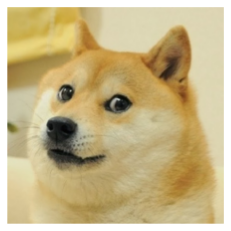

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("images/doge.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [17]:
import pandas as pd
from transformers import pipeline

image_classifier = pipeline("image-classification")
preds = image_classifier(image)
preds_df = pd.DataFrame(preds)
preds_df

,score,label
0,0.643600,"Eskimo dog, husky"
1,0.207406,Siberian husky
2,0.060160,"dingo, warrigal, warragal, Canis dingo"
3,0.035359,"Norwegian elkhound, elkhound"
4,0.012927,"malamute, malemute, Alaskan malamute"


### 테이블

<img alt="table-qa" width="800" caption="Question answering over a table (courtesy of Jonathan Herzig)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_table-qa.png?raw=1" id="tapas-table"/>

<img alt="tapas-architecture" width="800" caption="Architecture of TAPAS (courtesy of Jonathan Herzig)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_tapas-architecture.png?raw=1" id="tapas-architecture"/>

In [18]:
book_data = [
    {"chapter": 0, "name": "Introduction", "start_page": 1, "end_page": 11},
    {"chapter": 1, "name": "Text classification", "start_page": 12, 
     "end_page": 48},
    {"chapter": 2, "name": "Named Entity Recognition", "start_page": 49,
     "end_page": 73},
    {"chapter": 3, "name": "Question Answering", "start_page": 74, 
     "end_page": 120},
    {"chapter": 4, "name": "Summarization", "start_page": 121, 
     "end_page": 140},
    {"chapter": 5, "name": "Conclusion", "start_page": 141, 
     "end_page": 144}
]

In [19]:
table = pd.DataFrame(book_data)
table['number_of_pages'] = table['end_page']-table['start_page']
table = table.astype(str)
table

,chapter,name,start_page,end_page,number_of_pages
0,0,Introduction,1,11,10
1,1,Text classification,12,48,36
2,2,Named Entity Recognition,49,73,24
3,3,Question Answering,74,120,46
4,4,Summarization,121,140,19
5,5,Conclusion,141,144,3


In [20]:
table_qa = pipeline("table-question-answering")

In [21]:
table_qa = pipeline("table-question-answering")
queries = ["What's the topic in chapter 4?",
           "What is the total number of pages?",
           "On which page does the chapter about question-answering start?",
           "How many chapters have more than 20 pages?"]
preds = table_qa(table, queries)

In [27]:
for query, pred in zip(queries, preds):
    print(query)
    print("Predicted answer: " + pred["answer"])
    print('='*50)

What's the topic in chapter 4?
Predicted answer: Summarization
What is the total number of pages?
Predicted answer: SUM > 10, 36, 24, 46, 19, 3
On which page does the chapter about question-answering start?
Predicted answer: AVERAGE > 74
How many chapters have more than 20 pages?
Predicted answer: COUNT > 1, 2, 3


## 멀티모달 트랜스포머

### 스피치-투-텍스트

<img alt="wav2vec2" width="800" caption="Architecture of wav2vec 2.0 (courtesy of Alexei Baevski)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_wav2vec2.png?raw=1" id="wav2vec2"/>

In [28]:
asr = pipeline("automatic-speech-recognition")

In [29]:
from datasets import load_dataset

ds = load_dataset("superb", "asr", split="validation[:1]")
print(ds[0])

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/28539 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2703 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2620 [00:00<?, ? examples/s]

Dataset superb downloaded and prepared to /root/.cache/huggingface/datasets/superb/asr/1.9.0/b8183f71eabe8c559d7f3f528ab37a6a21ad1ee088fd3423574cecad8b3ec67e. Subsequent calls will reuse this data.
{'file': '/root/.cache/huggingface/datasets/downloads/extracted/3f10e98d93ce608a
c22fb2e825d2ce49a34482b4557f18c9c6f6106e31abe246/LibriSpeech/dev-clean/1272/1281
04/1272-128104-0000.flac', 'audio': {'path': '/root/.cache/huggingface/datasets/
downloads/extracted/3f10e98d93ce608ac22fb2e825d2ce49a34482b4557f18c9c6f6106e31ab
e246/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac', 'array':
array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00042725, 0.00057983,
       0.0010376 ], dtype=float32), 'sampling_rate': 16000}, 'text': 'MISTER
QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS
GOSPEL', 'speaker_id': 1272, 'chapter_id': 128104, 'id': '1272-128104-0000'}


In [30]:
import soundfile as sf

def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

ds = ds.map(map_to_array)

  0%|          | 0/1 [00:00<?, ?ex/s]

In [31]:
from IPython.display import Audio

display(Audio(ds[0]['speech'], rate=16000))

In [32]:
ds.set_format("numpy")

In [33]:
pred = asr(ds[0]["speech"])
print(pred)

{'text': 'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO
WELCOME HIS GOSPEL'}


<img alt="wav2vec-u" width="800" caption="Training scheme for wav2vec-U (courtesy of Alexsei Baevski)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_wav2vec-u.png?raw=1" id="wav2vec-u"/>

### 비전과 텍스트

#### VQA

<img alt="vqa" width="800" caption="Example of a visual question answering task from the VQA dataset (courtesy of Yash Goyal)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_vqa.png?raw=1" id="vqa"/>

#### LayoutLM

<img alt="layoutlm" width="500" caption="The model architecture and pretraining strategies for LayoutLMv2 (courtesy of Yang Xu)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_layoutlm.png?raw=1" id="layoutlm"/> 

#### DALL·E

<img alt="dall-e" width="800" caption="Generation examples with DALL·E (courtesy of Aditya Ramesh)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_dall-e.png?raw=1" id="dall-e"/>

#### CLIP

<img alt="clip-arch" width="800" caption="Architecture of CLIP (courtesy of Alec Radford)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter11_clip-arch.png?raw=1" id="clip-arch"/>

In [34]:
from transformers import CLIPProcessor, CLIPModel

clip_ckpt = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(clip_ckpt)
processor = CLIPProcessor.from_pretrained(clip_ckpt)

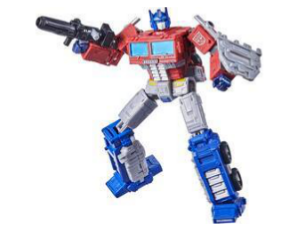

In [35]:
image = Image.open("images/optimusprime.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [36]:
import torch

texts = ["a photo of a transformer", "a photo of a robot", "a photo of agi"]
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
probs

tensor([[0.9557, 0.0413, 0.0031]])

## 다음 목적지는?